In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/daily-total-female-births.csv", parse_dates = ['Date'], index_col='Date')
print(f"Shape: {df.shape}")
df.head()

Shape: (365, 1)


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


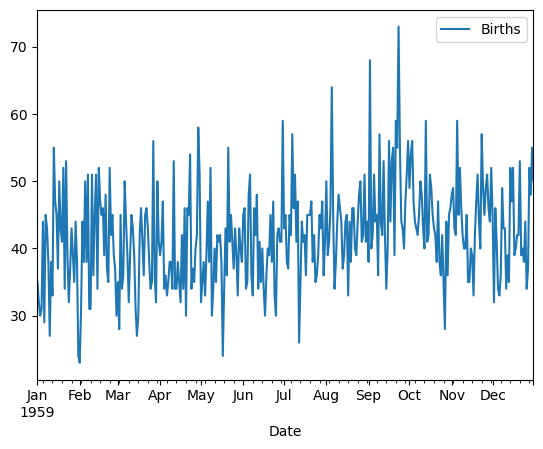

In [3]:
df.plot()
plt.show()

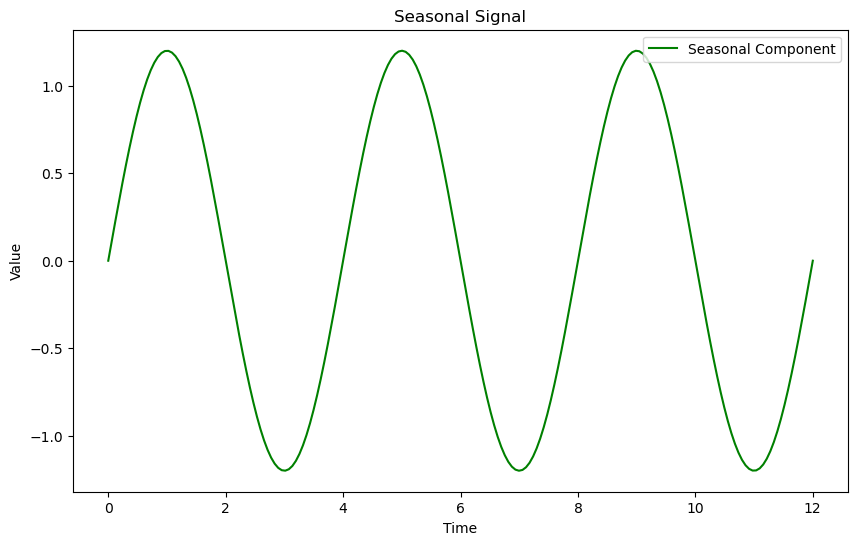

In [4]:
x = np.linspace(0, 12, num=200)
seasonality = 1.2 * np.sin(2 * np.pi * x / 4)

plt.figure(figsize=(10,6))
plt.plot(x, seasonality, label = "Seasonal Component", color = "g")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Seasonal Signal")
plt.legend()
plt.show()

In [5]:
df2 = pd.read_csv("data/daily-min-temperatures.csv", parse_dates = ['Date'], index_col='Date')
df2.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


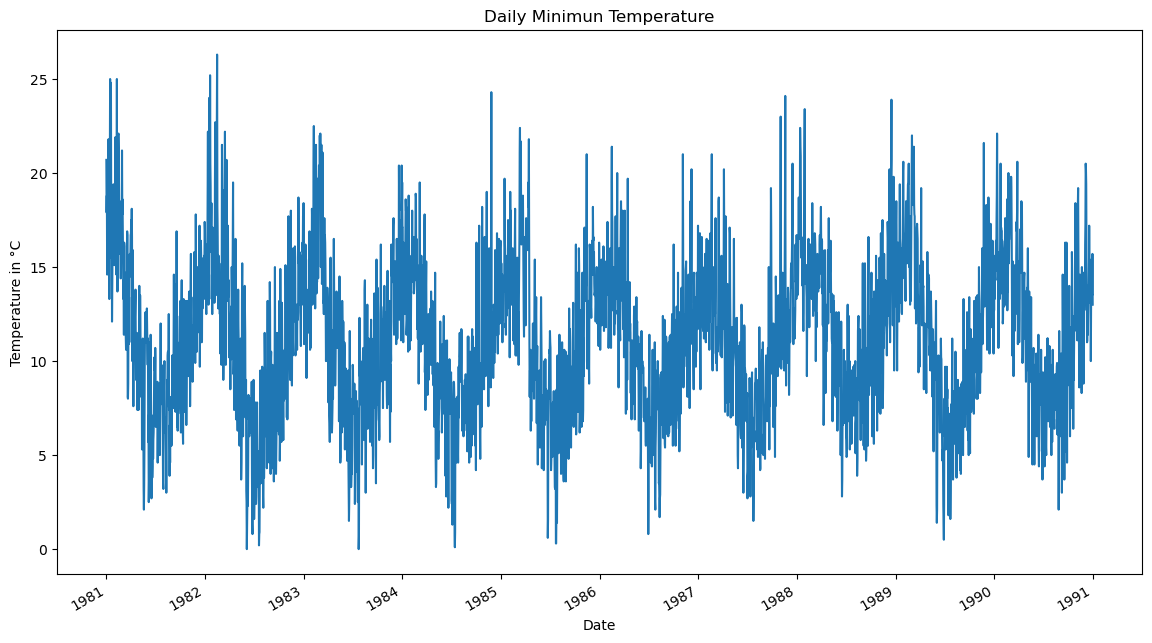

In [6]:
df2.plot(title = "Daily Minimun Temperature", figsize = (14, 8), legend = None)
plt.xlabel("Date")
plt.ylabel("Temperature in °C")
plt.show()

In [7]:
def kpss_test(series):
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f"KPSS Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Number of Lags: {n_lags}")
    print("Critical Values:")
    print("\n".join([f"{key} : {value:.4f}" for key, value in critical_values.items()]))
    print(f"Result: The Series is {'not' if p_value < 0.05 else ''} Stationary")

In [8]:
kpss_test(df)

KPSS Statistic: 1.6130
p-value: 0.0100
Number of Lags: 7
Critical Values:
10% : 0.3470
5% : 0.4630
2.5% : 0.5740
1% : 0.7390
Result: The Series is not Stationary


In [9]:
kpss_test(df2)

KPSS Statistic: 0.0557
p-value: 0.1000
Number of Lags: 36
Critical Values:
10% : 0.3470
5% : 0.4630
2.5% : 0.5740
1% : 0.7390
Result: The Series is  Stationary


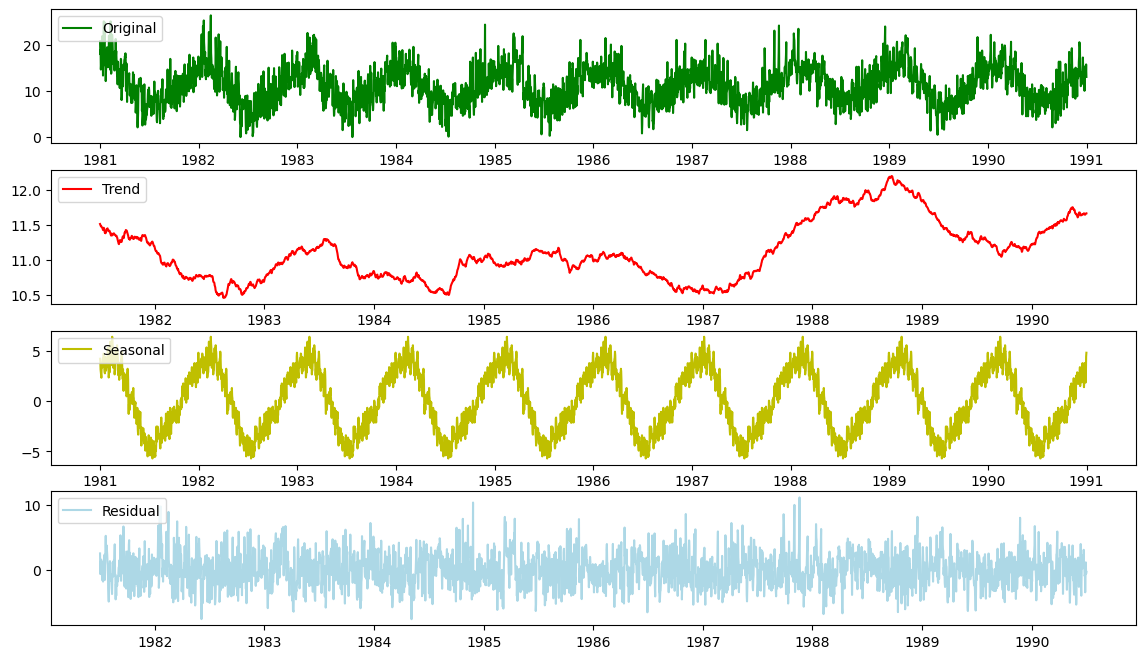

In [10]:
decomposition = seasonal_decompose(df2['Temp'], model = 'additive', period = 365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (14,8))
plt.subplot(411)
plt.plot(df2['Temp'], label = "Original", color ="g")
plt.legend(loc = "upper left")
plt.subplot(412)
plt.plot(trend, label="Trend", color ="r")
plt.legend(loc="upper left")
plt.subplot(413)
plt.plot(seasonal, label = "Seasonal", color ="y")
plt.legend(loc = "upper left")
plt.subplot(414)
plt.plot(residual, label="Residual", color ="lightblue")
plt.legend(loc="upper left")
plt.show()